## Register images using the background round.
Updated - 16 Nov. 2020

Round 0 in the CycIF protocol scans the tissue without any immunoflourescence marker present in all channels. If there is any signal picked up it would be the autoflourescence signal of the tissue itself. This autoflourescence signal can also be referred to as the background signal.

This example notebook works with one of this datasets that can be downloaded form Synapse: [breast cancer TMAs](https://www.synapse.org/#!Synapse:syn21628965). Part of the notebook involves cropping the images to remove adjacent TMA tissue, which is done by defining boundaries to crop the images. These hard-coded boundaries will only work correctly for this dataset.

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import sys
sys.path.append('..')

from mpleximreg import registration, viz, utils
from pandas import concat, read_csv
from imageio import imread, imwrite

from os import makedirs
from os.path import join

In [7]:
# parameters
# unregistered data directories
brca_raw_dir = '/data/brca_unregistered_tifs'
hcc1143_raw_dir = '/data/hcc1143_unregistered_tifs'
tonsil_raw_dir = '/data/tonsil_unregistered_tifs'

# registered data directories - for saving registered images
brca_backgroundreg_dir = '/data/brca_backgroundreg_tifs'
hcc1143_backgroundreg_dir = '/data/hcc1143_backgroundreg_tifs'
tonsil_backgroundreg_dir = '/data/tonsil_backgroundreg_tifs'

# directory with the text file for performing SimpleElastix non-rigid registration
txt_file_dir = '../simpleITK_nonrigidreg_files/'

## Register using the background round as target

In [10]:
registration.nonrigid_transform_dir(brca_raw_dir, brca_backgroundreg_dir, txt_file_dir, target_round=0, reg_channel=2)
registration.tre_dir(brca_backgroundreg_dir, 2, method='Nonrigid registration - Background', dataset='BRCA (OHSU)', target_round=0,
                     save_path='../Data_Files/BRCA_backgroundreg_results.csv')

Registering round 9
Registering round 2
Registering round 4
Registering round 5
Registering round 7
Registering round 11
Registering round 8
Registering round 6
Registering round 1
Registering round 3
Registering round 10
Calculating for round 9
Calculating for round 2
Calculating for round 4
Calculating for round 5
Calculating for round 7
Calculating for round 11
Calculating for round 8
Calculating for round 6
Calculating for round 1
Calculating for round 3
Calculating for round 10


,Registration Method,Target Round,Moving Round,Registration Channel,Dataset,TRE,Mean Error (um)
0,Nonrigid registration - Background,0,R9,2,BRCA (OHSU),0.000242,1.971694
1,Nonrigid registration - Background,0,R2,2,BRCA (OHSU),0.000260,2.112762
2,Nonrigid registration - Background,0,R4,2,BRCA (OHSU),0.000194,1.577056
3,Nonrigid registration - Background,0,R5,2,BRCA (OHSU),0.000206,1.679000
4,Nonrigid registration - Background,0,R7,2,BRCA (OHSU),0.000294,2.389251
5,Nonrigid registration - Background,0,R11,2,BRCA (OHSU),0.000326,2.653703
6,Nonrigid registration - Background,0,R8,2,BRCA (OHSU),0.000203,1.653880
7,Nonrigid registration - Background,0,R6,2,BRCA (OHSU),0.000200,1.629552
8,Nonrigid registration - Background,0,R1,2,BRCA (OHSU),0.000203,1.648813
9,Nonrigid registration - Background,0,R3,2,BRCA (OHSU),0.000220,1.792088


In [11]:
registration.nonrigid_transform_dir(hcc1143_raw_dir, hcc1143_backgroundreg_dir, txt_file_dir, target_round=0, reg_channel=2)
registration.tre_dir(hcc1143_backgroundreg_dir, 2, method='Nonrigid registration - Background', dataset='HCC1143 (OHSU)', target_round=0,
                     save_path='../Data_Files/HCC1143_backgroundreg_results.csv')

Registering round 1
Registering round 7
Registering round 5
Registering round 9
Registering round 10
Registering round 4
Registering round 6
Registering round 8
Registering round 11
Registering round 3
Registering round 2
Calculating for round 1
Calculating for round 7
Calculating for round 5
Calculating for round 9
Calculating for round 10
Calculating for round 4
Calculating for round 6
Calculating for round 8
Calculating for round 11
Calculating for round 3
Calculating for round 2


,Registration Method,Target Round,Moving Round,Registration Channel,Dataset,TRE,Mean Error (um)
0,Nonrigid registration - Background,0,R1,2,HCC1143 (OHSU),0.000102,0.829964
1,Nonrigid registration - Background,0,R7,2,HCC1143 (OHSU),0.000163,1.322324
2,Nonrigid registration - Background,0,R5,2,HCC1143 (OHSU),0.000249,2.027702
3,Nonrigid registration - Background,0,R9,2,HCC1143 (OHSU),0.067399,547.974548
4,Nonrigid registration - Background,0,R10,2,HCC1143 (OHSU),0.000119,0.967156
5,Nonrigid registration - Background,0,R4,2,HCC1143 (OHSU),0.000256,2.081179
6,Nonrigid registration - Background,0,R6,2,HCC1143 (OHSU),0.000169,1.377194
7,Nonrigid registration - Background,0,R8,2,HCC1143 (OHSU),0.000179,1.456136
8,Nonrigid registration - Background,0,R11,2,HCC1143 (OHSU),0.000194,1.579560
9,Nonrigid registration - Background,0,R3,2,HCC1143 (OHSU),0.000217,1.763636


In [12]:
registration.nonrigid_transform_dir(tonsil_raw_dir, tonsil_backgroundreg_dir, txt_file_dir, target_round=0, reg_channel=2)
registration.tre_dir(tonsil_backgroundreg_dir, 2, method='Nonrigid registration - Background', dataset='Tonsil (OHSU)', target_round=0,
                     save_path='../Data_Files/Tonsil_backgroundreg_results.csv')

Registering round 5
Registering round 7
Registering round 2
Registering round 6
Registering round 10
Registering round 1
Registering round 11
Registering round 8
Registering round 9
Registering round 4
Registering round 3
Calculating for round 5
Calculating for round 7
Calculating for round 2
Calculating for round 6
Calculating for round 10
Calculating for round 1
Calculating for round 11
Calculating for round 8
Calculating for round 9
Calculating for round 4
Calculating for round 3


,Registration Method,Target Round,Moving Round,Registration Channel,Dataset,TRE,Mean Error (um)
0,Nonrigid registration - Background,0,R5,2,Tonsil (OHSU),0.000385,3.136669
1,Nonrigid registration - Background,0,R7,2,Tonsil (OHSU),0.000261,2.125777
2,Nonrigid registration - Background,0,R2,2,Tonsil (OHSU),0.000646,5.257152
3,Nonrigid registration - Background,0,R6,2,Tonsil (OHSU),0.000196,1.594572
4,Nonrigid registration - Background,0,R10,2,Tonsil (OHSU),0.000168,1.371435
5,Nonrigid registration - Background,0,R1,2,Tonsil (OHSU),0.000108,0.882501
6,Nonrigid registration - Background,0,R11,2,Tonsil (OHSU),0.000164,1.331971
7,Nonrigid registration - Background,0,R8,2,Tonsil (OHSU),0.000223,1.814237
8,Nonrigid registration - Background,0,R9,2,Tonsil (OHSU),0.000239,1.943119
9,Nonrigid registration - Background,0,R4,2,Tonsil (OHSU),0.001226,9.978830


## Visualizel the results for the BRCA dataset

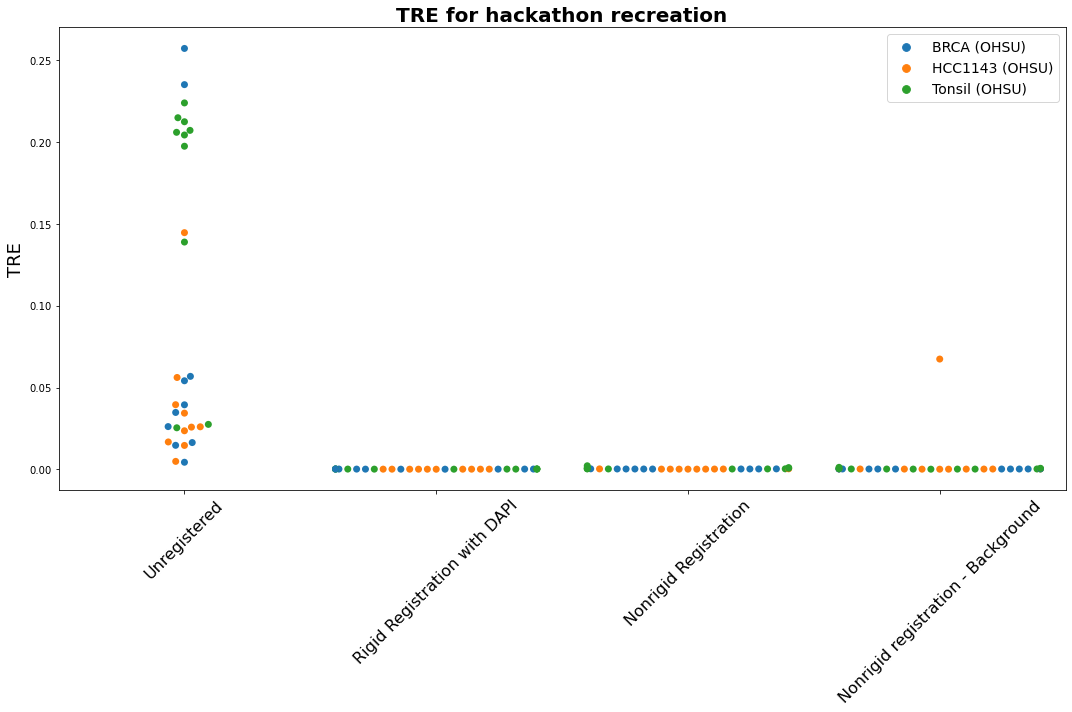

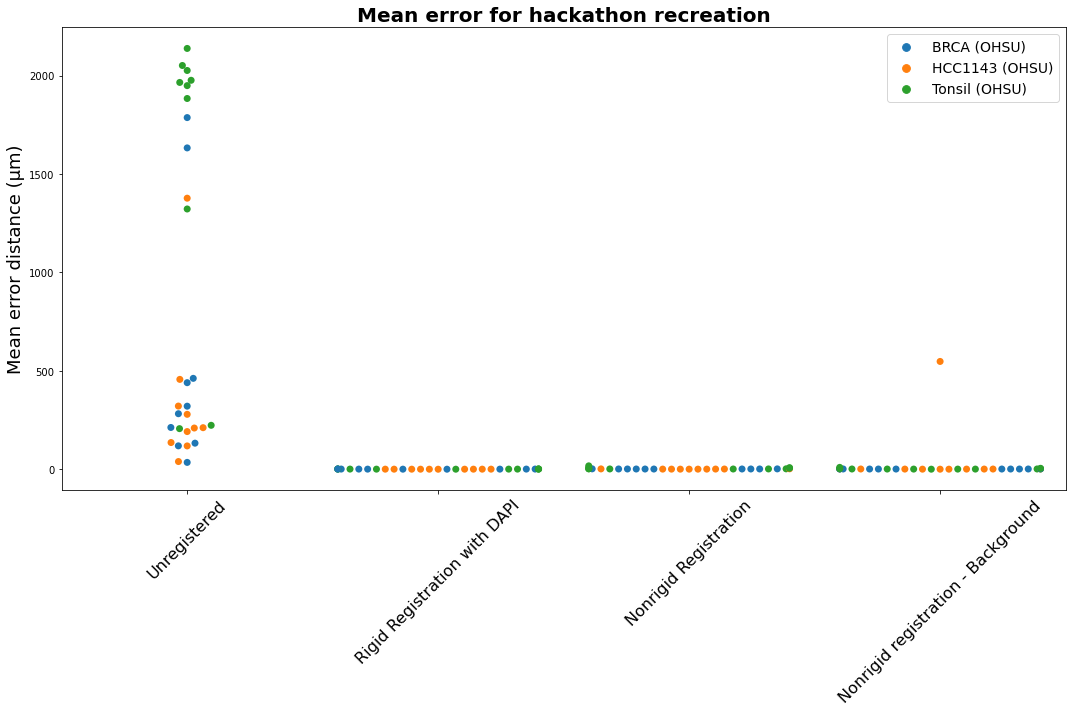

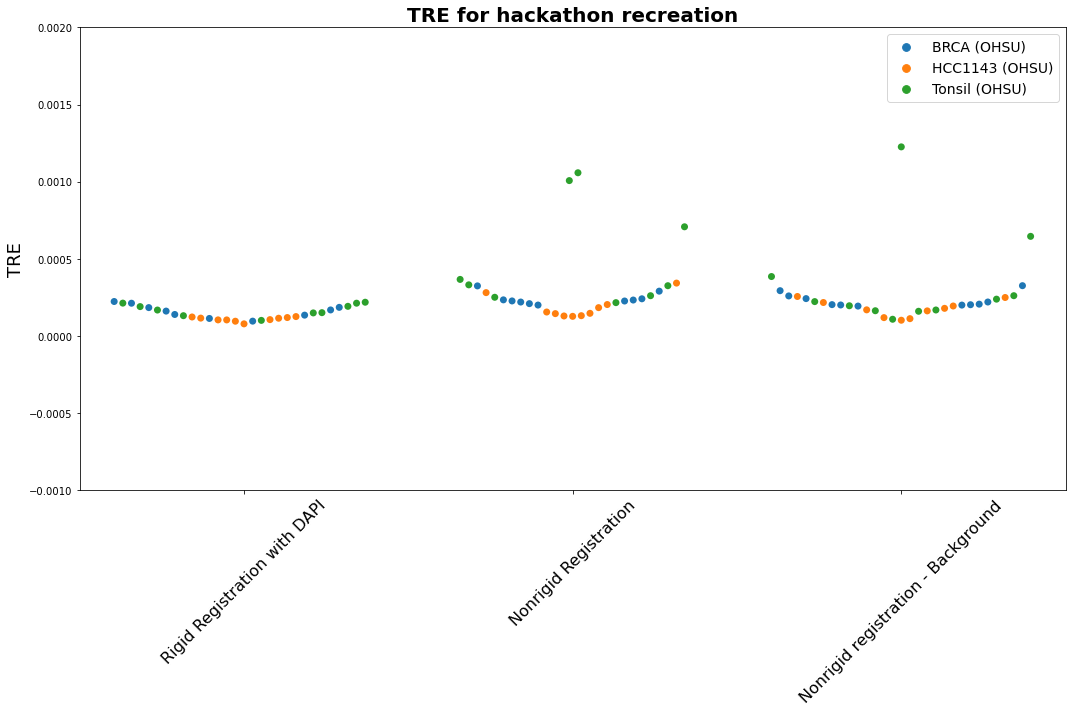

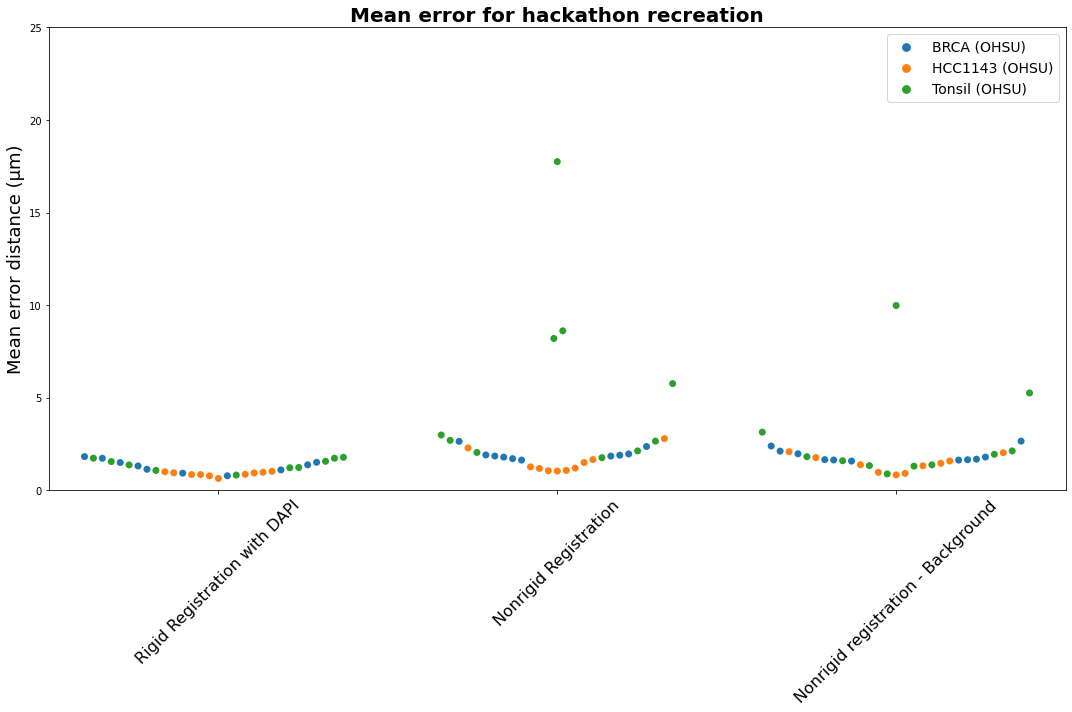

In [22]:
# concatenate all the files needed
df = concat([
    read_csv('../Data_Files/BRCA_hackathon_recreation_rigid_results.csv'),
    read_csv('../Data_Files/HCC1143_hackathon_recreation_rigid_results.csv'),
    read_csv('../Data_Files/Tonsil_hackathon_recreation_rigid_results.csv'),
    read_csv('../Data_Files/BRCA_hackathon_recreation_noreg_results.csv'),
    read_csv('../Data_Files/HCC1143_hackathon_recreation_noreg_results.csv'),
    read_csv('../Data_Files/Tonsil_hackathon_recreation_noreg_results.csv'),
    read_csv('../Data_Files/BRCA_hackathon_recreation_nonrigid_results.csv'),
    read_csv('../Data_Files/HCC1143_hackathon_recreation_nonrigid_results.csv'),
    read_csv('../Data_Files/Tonsil_hackathon_recreation_nonrigid_results.csv'),
    read_csv('../Data_Files/BRCA_backgroundreg_results.csv'),
    read_csv('../Data_Files/HCC1143_backgroundreg_results.csv'),
    read_csv('../Data_Files/Tonsil_backgroundreg_results.csv')
], ignore_index=True)

order = ['Unregistered', 'Rigid Registration with DAPI', 'Nonrigid Registration', 'Nonrigid registration - Background']
viz.pretty_swarm_plot(df, save_path='../Figures/All_data_with_background', hue='Dataset', order=order, figsize=(15, 10))

order = ['Rigid Registration with DAPI', 'Nonrigid Registration', 'Nonrigid registration - Background']
viz.pretty_swarm_plot(df, save_path='../Figures/All_data_with_background_regOnly', hue='Dataset', order=order, figsize=(15, 10), 
                      ylims=[(-.001, 0.0020), (0, 25)])

## Crop images to remove side TMA tissue and register again with background round as target

In [34]:
# create dir to save new "cropped" images
cropped_dir = '/data/brca_cropped_unregistered_tifs'
makedirs(cropped_dir, exist_ok=True)

# create a dict with the left and bottom coordiates to crop image with
# note that adjacent TMAs in this dataset are only seen in the left and bottom
crop_dicts = {
    0: {'left': 500, 'bottom': 4750}, 1: {'left': 1000, 'bottom': 5000}, 2: {'left': 1000, 'bottom': 4750},
    3: {'left': 1250, 'bottom': 4500}, 4: {'left': 0, 'bottom': 5000}, 5: {'left': 1250, 'bottom': 4500},
    6: {'left': 0, 'bottom': 4500}, 7: {'left': 1250, 'bottom': 4750}, 8: {'left': 1250, 'bottom': 4500},
    9: {'left': 1250, 'bottom': 5000}, 10: {'left': 1500, 'bottom': 5000}, 11: {'left': 1000, 'bottom': 5000}
}

# loop through each round
raw_tif_dict = utils.parse_tif_dir(brca_raw_dir)
for _round, channel_dict in raw_tif_dict.items():
    # croop coordinates for this round
    crop_dict = crop_dicts[_round]
    
    # loop through each channel in round
    for impath in channel_dict.values():
        filename = impath.split('/')[-1]
        
        # read image
        im = imread(impath)
        
        # crop the image
        im = im[0:crop_dict['bottom'], crop_dict['left']::]
        
        # save the image
        imwrite(join(cropped_dir, filename), im)

In [35]:
cropped_dir_reg = '/data/brca_cropped_registered_tifs'
registration.nonrigid_transform_dir(cropped_dir, cropped_dir_reg, txt_file_dir, target_round=0, reg_channel=2)
registration.tre_dir(cropped_dir_reg, 2, method='Nonrigid registration - Background (Cropped)', dataset='BRCA (OHSU)', target_round=0,
                     save_path='../Data_Files/BRCA_backgroundreg_cropped_results.csv')

Registering round 9
Registering round 2
Registering round 4
Registering round 5
Registering round 7
Registering round 11
Registering round 8
Registering round 6
Registering round 1
Registering round 3
Registering round 10
Calculating for round 9
Calculating for round 2
Calculating for round 4
Calculating for round 5
Calculating for round 7
Calculating for round 11
Calculating for round 8
Calculating for round 6
Calculating for round 1
Calculating for round 3
Calculating for round 10


,Registration Method,Target Round,Moving Round,Registration Channel,Dataset,TRE,Mean Error (um)
0,Nonrigid registration - Background (Cropped),0,R9,2,BRCA (OHSU),0.000261,1.850832
1,Nonrigid registration - Background (Cropped),0,R2,2,BRCA (OHSU),0.000270,1.911314
2,Nonrigid registration - Background (Cropped),0,R4,2,BRCA (OHSU),0.000222,1.572138
3,Nonrigid registration - Background (Cropped),0,R5,2,BRCA (OHSU),0.000177,1.255949
4,Nonrigid registration - Background (Cropped),0,R7,2,BRCA (OHSU),0.000220,1.556773
5,Nonrigid registration - Background (Cropped),0,R11,2,BRCA (OHSU),0.000299,2.116654
6,Nonrigid registration - Background (Cropped),0,R8,2,BRCA (OHSU),0.000230,1.629723
7,Nonrigid registration - Background (Cropped),0,R6,2,BRCA (OHSU),0.000200,1.418646
8,Nonrigid registration - Background (Cropped),0,R1,2,BRCA (OHSU),0.000187,1.328930
9,Nonrigid registration - Background (Cropped),0,R3,2,BRCA (OHSU),0.000176,1.245634


## Visualize the results with cropped images

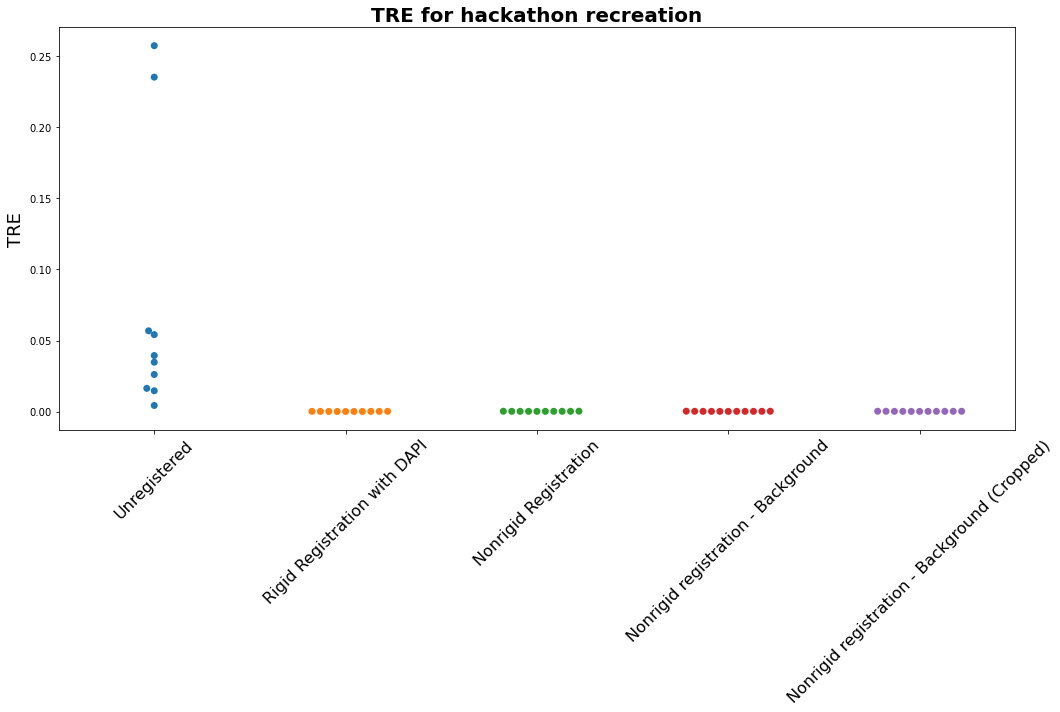

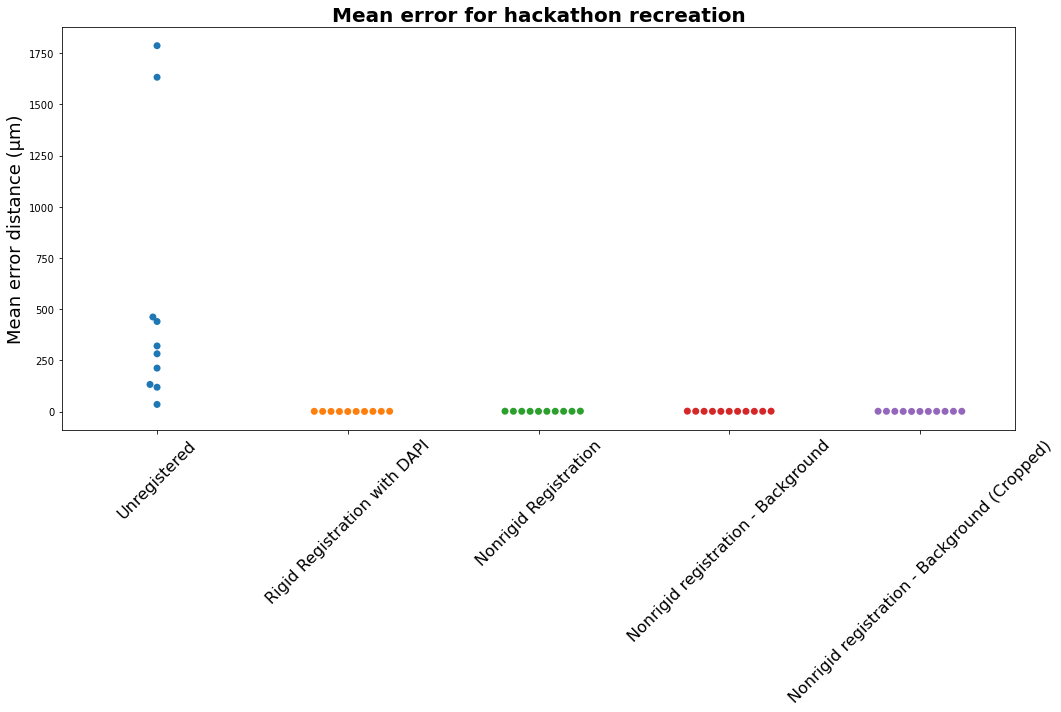

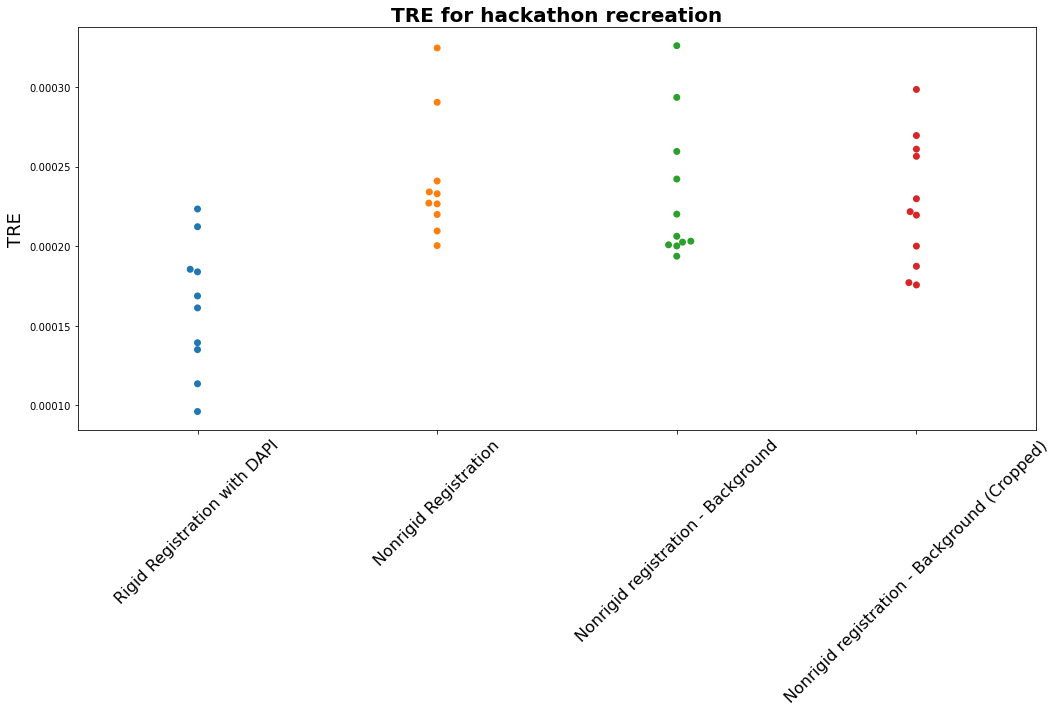

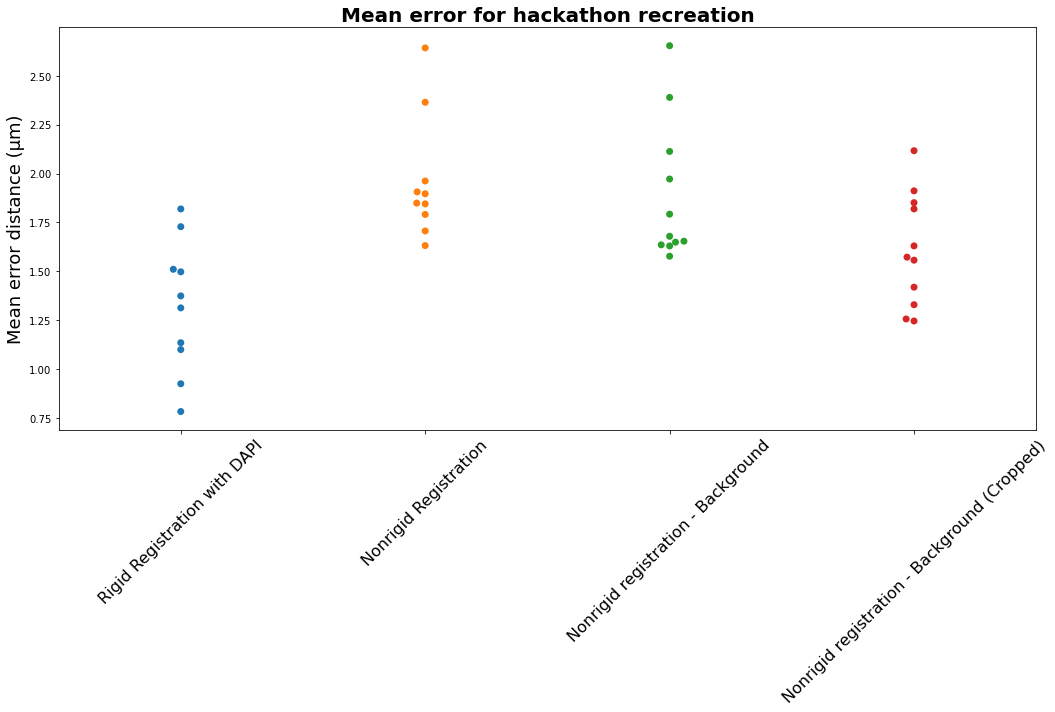

In [37]:
# concatenate all the files needed
df = concat([
    read_csv('../Data_Files/BRCA_hackathon_recreation_rigid_results.csv'),
    read_csv('../Data_Files/BRCA_hackathon_recreation_noreg_results.csv'),
    read_csv('../Data_Files/BRCA_hackathon_recreation_nonrigid_results.csv'),
    read_csv('../Data_Files/BRCA_backgroundreg_results.csv'),
    read_csv('../Data_Files/BRCA_backgroundreg_cropped_results.csv')
], ignore_index=True)

order = ['Unregistered', 'Rigid Registration with DAPI', 'Nonrigid Registration', 'Nonrigid registration - Background', 
         'Nonrigid registration - Background (Cropped)']
viz.pretty_swarm_plot(df, save_path='../Figures/brca_background_cropped', hue=None, order=order, figsize=(15, 10))

order = ['Rigid Registration with DAPI', 'Nonrigid Registration', 'Nonrigid registration - Background', 
         'Nonrigid registration - Background (Cropped)']
viz.pretty_swarm_plot(df, save_path='../Figures/brca_background_cropped_regOnly', hue=None, order=order, figsize=(15, 10))